# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

# importing data to variable called breast_cancer

In [2]:
breast_cancer = pd.read_csv("C:/Users/Rajeswari Sohith/Documents/MLDM/Task 1A/Breast_Cancer.csv")
breast_cancer

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# Data Understanding

<div class="alert alert-block alert-info">
<b>T Stage:</b> <br><br> Using the TNA system, the “T” plus a letter or number (1 to 4) is used to describe the size and location of the tumor.
</div>

Stage may also be divided into smaller groups that help describe the tumor in even more detail. Specific tumor stage information in listed below.

- <b>T1:</b> The tumor in the breast is 20 millimeters (mm) or smaller in size at its widest area. This is a little less than an inch. 

- <b>T2:</b> The tumor is larger than 20 mm but not larger than 50 mm.

- <b>T3:</b> The tumor is larger than 50 mm.

- <b>T4:</b> The tumor falls into chest wall or skin or both.
***

<div class="alert alert-block alert-warning">
<b>N Stage:</b><br><br> The “N” in the TNA staging system stands for lymph nodes. These small, bean-shaped organs help fight infection. Lymph nodes near where the cancer started are called regional lymph nodes. Regional lymph nodes include:
</div>

Lymph nodes located under the arm, called the axillary lymph nodes

Lymph nodes located above and below the collarbone

Lymph nodes located under the breastbone, called the internal mammary lymph nodes

Lymph nodes in other parts of the body are called distant lymph nodes. The information below describes the staging.

- <b>N1:</b> The cancer has spread to 1 to 3 axillary lymph nodes and/or the internal mammary lymph nodes. If the cancer in the lymph node is larger than 0.2 mm but 2 mm or smaller, it is called "micrometastatic".

- <b>N2:</b> The cancer has spread to 4 to 9 axillary lymph nodes. Or, it has spread to the internal mammary lymph nodes, but not the axillary lymph nodes.

- <b>N3:</b> The cancer has spread to 10 or more axillary lymph nodes, or it has spread to the lymph nodes located under the clavicle, or collarbone. It may have also spread to the internal mammary lymph nodes. Cancer that has spread to the lymph nodes above the clavicle, called the supraclavicular lymph nodes, is also described as N3.
***

<div class="alert alert-block alert-danger">
<b>A Stage</b> <br><br>It describes whether the cancer has spread to other parts of the body, called metastasis. This is no longer considered early-stage or locally advanced cancer.
</div>


- <b>Regional:</b> Cancer has spread to nearby lymph nodes, tissues, or organs.
- <b>Distant:</b> Cancer has spread to distant parts of the body.
***

<div class="alert alert-block alert-success">
<b>6th Stage</b> <br><br>Doctors assign the stage of the cancer by combining the T, N, and A classifications (see above), the tumor grade, and the results of ER/PR and HER2 testing. This information is used to help determine your prognosis (see Diagnosis). The simpler approach to explaining the stage of breast cancer is to use the T, N, and A classifications alone. This is the approach used below to describe the different stages.
</div>




- <b>Stage IIA:</b> Any 1 of these conditions:

    1. There is no evidence of a tumor in the breast, but the cancer has spread to 1 to 3 axillary lymph nodes. It has not spread to distant parts of the body (T0, N1, Regional).

    1. The tumor is 20 mm or smaller and has spread to 1 to 3 axillary lymph nodes (T1, N1, Regional).

    1. The tumor is larger than 20 mm but not larger than 50 mm and has not spread to the axillary lymph nodes (T2, N0, Regional). 
    <br>



- <b>Stage IIB:</b> Either of these conditions:

    1. The tumor is larger than 20 mm but not larger than 50 mm and has spread to 1 to 3 axillary lymph nodes (T2, N1, Regional).
    
    1. The tumor is larger than 50 mm but has not spread to the axillary lymph nodes (T3, N0, Regional).
    <br>

- <b>Stage IIIA:</b> The tumor of any size has spread to 4 to 9 axillary lymph nodes or to internal mammary lymph nodes. It has not spread to other parts of the body (T0, T1, T2, or T3; N2; Regional). Stage IIIA may also be a tumor larger than 50 mm that has spread to 1 to 3 axillary lymph nodes (T3, N1, Regional).

- <b>Stage IIIB:</b> The tumor has spread to the chest wall or caused swelling or ulceration of the breast, or it is diagnosed as inflammatory breast cancer. It may or may not have spread to up to 9 axillary or internal mammary lymph nodes. It has not spread to other parts of the body (T4; N0, N1, or N2; Regional).

- <b>Stage IIIC:</b> A tumor of any size that has spread to 10 or more axillary lymph nodes, the internal mammary lymph nodes, and/or the lymph nodes under the collarbone. It has not spread to other parts of the body (any T, N3, Regional).
<br> <br>

**Breast Cancer statistics in World:**
   - It’s the most common type of cancer in Women.
   - It’s the Second most common cancer in the World.
   - In Europe, 24% are in the 1st stage on cancer.
   - Breast Cancer is the 6th cause of death in World.

<br> <br>
*Reference: <a href="https://www.cancer.net/cancer-types/breast-cancer/stages"> cancer.org</a>*

In [3]:
print("Our data has {breast_cancer.shape[0]} Rows and {breast_cancer.shape[1]} Columns.")
print("Are there any missing values?", breast_cancer.isnull().any().any())

Our data has {breast_cancer.shape[0]} Rows and {breast_cancer.shape[1]} Columns.
Are there any missing values? False


In [4]:
int_breast_cancer =breast_cancer.select_dtypes(include='int64').columns

# Data Encoding

In [5]:
breast_cancer.rename(columns={"T Stage ": "T Stage"}, inplace=True)
breast_cancer["Grade"].replace({" anaplastic; Grade IV": "4"}, inplace=True)
breast_cancer["Grade"] = breast_cancer["Grade"].astype(int)
breast_cancer["T Stage"].replace({"T1":0, "T2": 1, "T3":2, "T4": 3}, inplace=True)
breast_cancer["N Stage"].replace({"N1":0, "N2": 1, "N3":2}, inplace=True)
breast_cancer["6th Stage"].replace({"IIA":0, "IIB": 1, "IIIA":2, "IIIB": 3,"IIIC":4}, inplace=True)
breast_cancer["differentiate"].replace({"Moderately differentiated": 2,
                            "Poorly differentiated": 1,
                            "Well differentiated": 3,
                            "Undifferentiated": 0}, inplace=True)
breast_cancer["A Stage"].replace({"Regional":0, "Distant": 1}, inplace=True)
breast_cancer["Estrogen Status"].replace({"Positive":0, "Negative": 1}, inplace=True)
breast_cancer["Progesterone Status"].replace({"Positive":0, "Negative": 1}, inplace=True)
breast_cancer["Status"].replace({"Alive":0, "Dead": 1}, inplace=True)

In [6]:
breast_cancer = pd.get_dummies(breast_cancer,columns=['Race','Marital Status'], dtype=int, drop_first=True)

In [7]:
breast_cancer.sample(5)

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
1176,66,0,1,2,1,3,0,6,0,1,22,6,58,0,1,0,1,0,0,0
2588,59,1,0,1,1,3,0,24,0,0,12,2,21,0,0,1,1,0,0,0
1525,65,0,0,0,2,2,0,15,0,0,1,1,91,0,0,1,1,0,0,0
1139,57,3,0,3,2,2,1,11,1,0,21,2,99,0,0,1,1,0,0,0
306,40,1,0,1,2,2,0,21,0,0,22,3,75,0,0,1,1,0,0,0


In [8]:
print(breast_cancer.shape)
breast_cancer.drop_duplicates(inplace = True)
print(breast_cancer.shape)

(4024, 20)
(4023, 20)


# EDA

In [9]:
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4023.0,53.969923,8.963118,30.0,47.0,54.0,61.0,69.0
T Stage,4023.0,0.784986,0.765526,0.0,0.0,1.0,1.0,3.0
N Stage,4023.0,0.438479,0.693531,0.0,0.0,0.0,1.0,2.0
6th Stage,4023.0,1.322148,1.266610,0.0,0.0,1.0,2.0,4.0
differentiate,4023.0,1.849366,0.638309,0.0,1.0,2.0,2.0,3.0
Grade,4023.0,2.150634,0.638309,1.0,2.0,2.0,3.0,4.0
A Stage,4023.0,0.022869,0.149503,0.0,0.0,0.0,0.0,1.0
Tumor Size,4023.0,30.477007,21.121253,1.0,16.0,25.0,38.0,140.0
Estrogen Status,4023.0,0.066866,0.249820,0.0,0.0,0.0,0.0,1.0
Progesterone Status,4023.0,0.173502,0.378728,0.0,0.0,0.0,0.0,1.0


In [10]:
breast_cancer.isnull().sum()

Age                         0
T Stage                     0
N Stage                     0
6th Stage                   0
differentiate               0
Grade                       0
A Stage                     0
Tumor Size                  0
Estrogen Status             0
Progesterone Status         0
Regional Node Examined      0
Reginol Node Positive       0
Survival Months             0
Status                      0
Race_Other                  0
Race_White                  0
Marital Status_Married      0
Marital Status_Separated    0
Marital Status_Single       0
Marital Status_Widowed      0
dtype: int64

In [11]:
print(breast_cancer['Status'].value_counts())

fig1 = px.pie(breast_cancer, names='Status') # 0 = Alive, 1 = Dead
fig1.show(renderer='iframe')

0    3407
1     616
Name: Status, dtype: int64


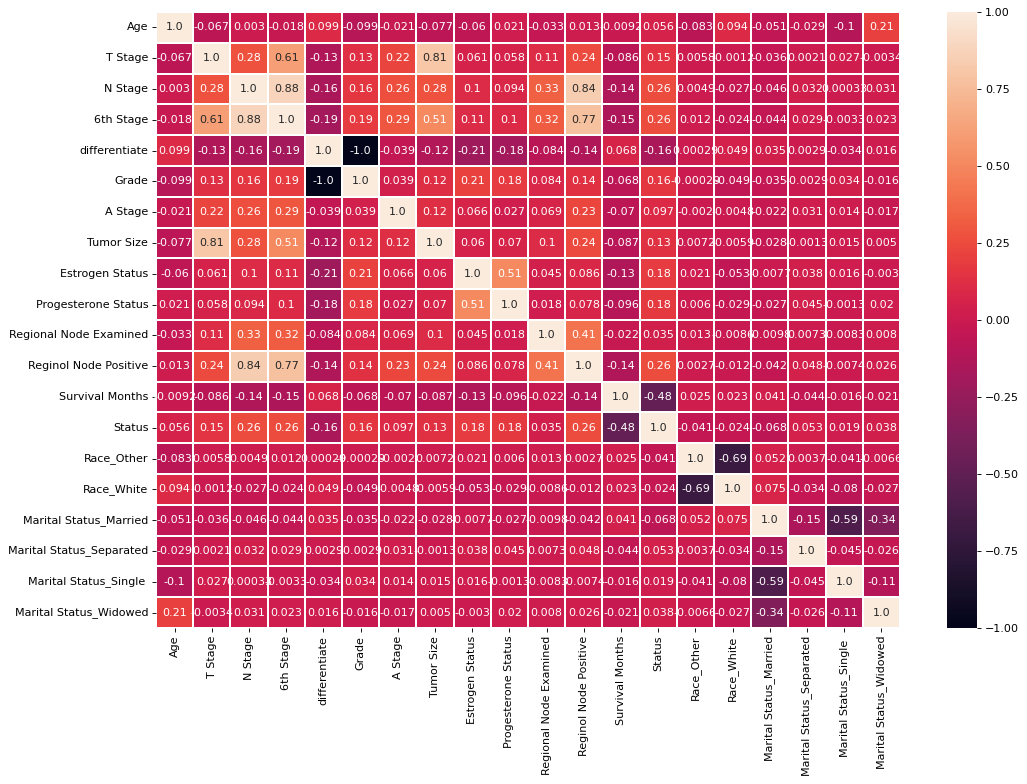

In [12]:
corr = breast_cancer.corr()
plt.figure(figsize=(15, 10), dpi = 80)
sns.heatmap(corr, annot = True, fmt = '.2', linewidths=.1)
plt.show();

Tumor Size is highly correlated with T Stage. T Stage divide Tumor Size into 4 group, So we don't need Tumor Size feature and we can drop it.
- As we can see Tumor Size and T Stage is highly correlated as I described before. I Seperate 20mm and 50mm with Vertical line (Red Dashed line) 
    - T1 = Between 0 to 20mm
    - T2 = Between 20 to 50mm
    - T3 = 50mm and higher 

In [13]:
breast_cancer.groupby('6th Stage')['Status'].mean()

6th Stage
0    0.073620
1    0.119469
2    0.175238
3    0.298507
4    0.383475
Name: Status, dtype: float64

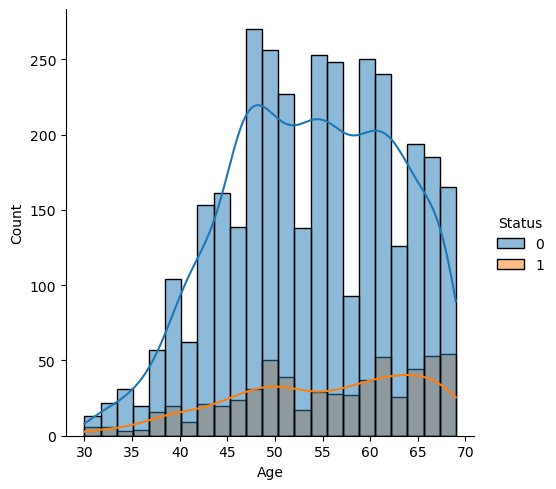

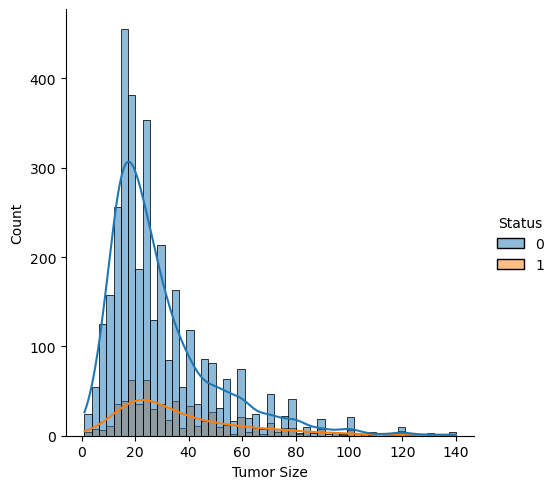

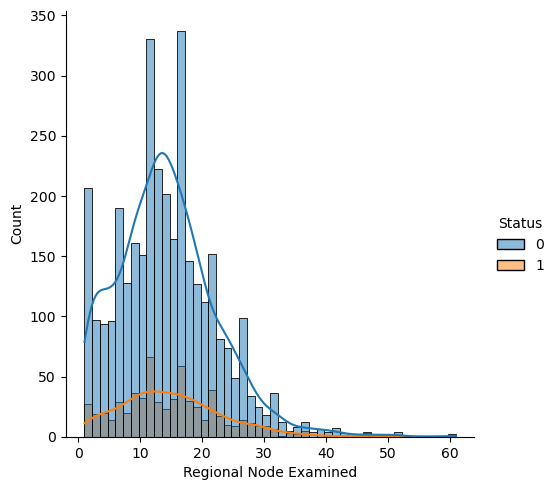

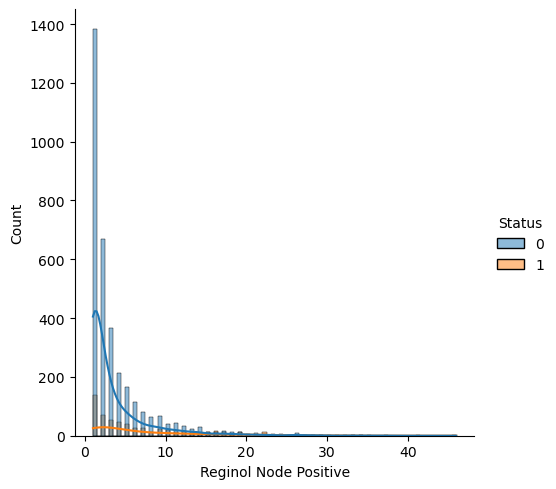

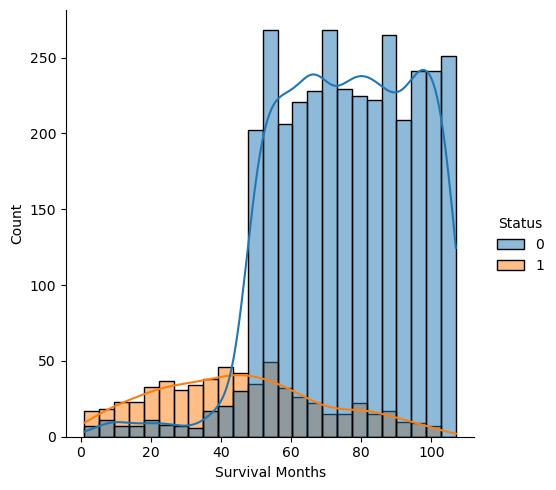

In [14]:
for col in int_breast_cancer:
    sns.displot(data= breast_cancer, x=col, kde = True, hue='Status')

Because we can get TNA Stage with **6th grade** feature so we don't need **"Tumor Size", "T Stage", "N Stage" and "A Stage"** features and we can drop this columns. <br>
Because **estrogen** and **progesterone** are both female hormones then we can remove one of the features. <br>
**Married, Single** & **White, Other** are *highly correlated* so we can remove one of the features.

In [15]:
breast_cancer.drop(['Tumor Size', 'T Stage', 'N Stage', 'A Stage', 'Reginol Node Positive', 'Progesterone Status', 'Race_Other', 'Marital Status_Married', 'differentiate'], axis= 1, inplace= True)

In [16]:
breast_cancer.corr()['Status'].sort_values(ascending=False)

Status                      1.000000
6th Stage                   0.257566
Estrogen Status             0.184628
Grade                       0.161378
Age                         0.056036
Marital Status_Separated    0.053227
Marital Status_Widowed      0.038313
Regional Node Examined      0.034705
Marital Status_Single       0.018858
Race_White                 -0.023934
Survival Months            -0.476622
Name: Status, dtype: float64

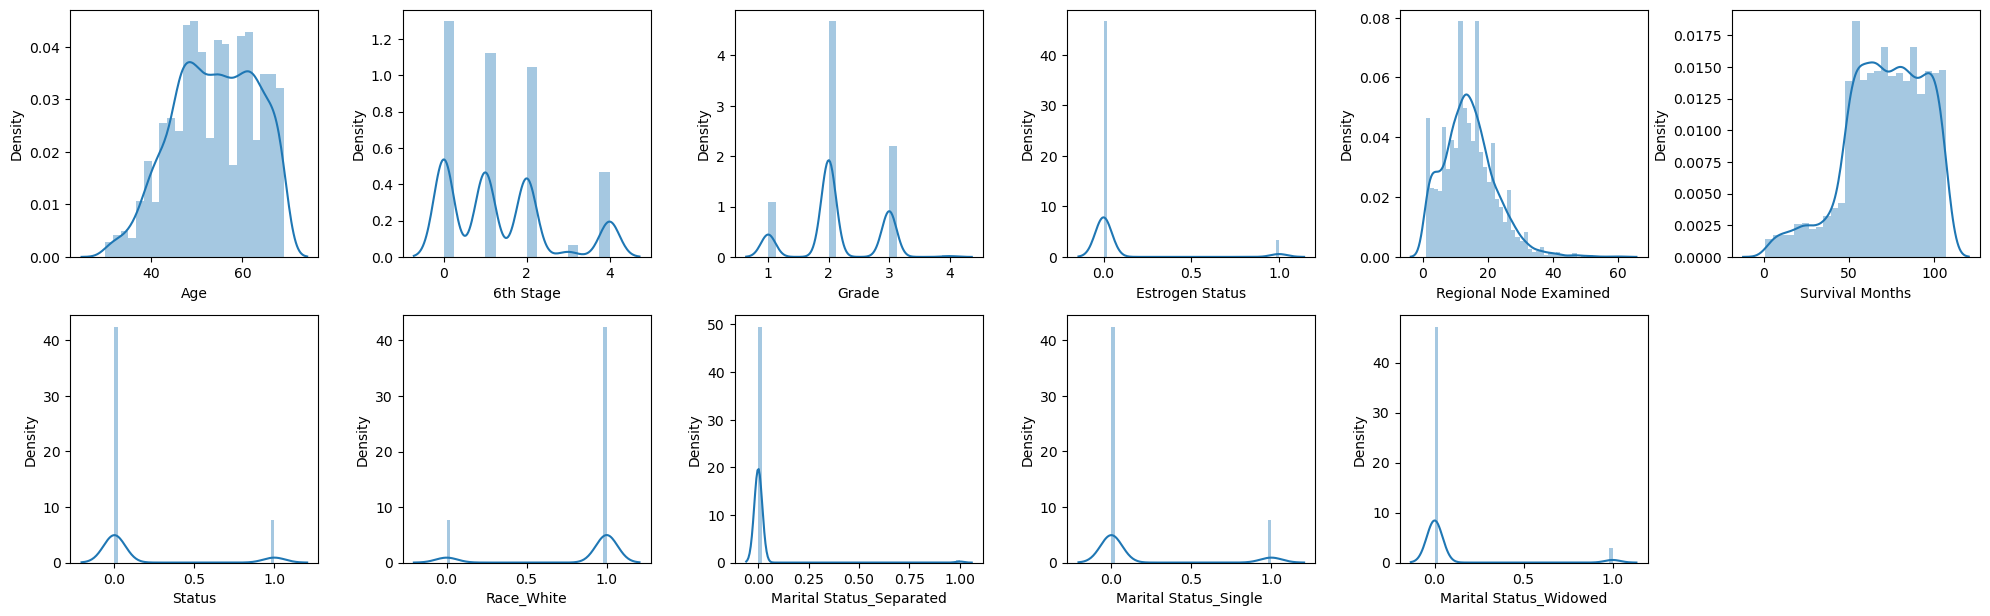

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in breast_cancer:
    if plotnumber <= len(breast_cancer.columns):
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(breast_cancer[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show();


As we can see, Cancer grade of most patients in this data is **2**

In [18]:
fig5 = px.histogram(breast_cancer, 'Grade')
fig5.show(renderer='iframe')

We don't have outliers in this data. (Z-score)

In [19]:
from scipy import stats

for column in breast_cancer.columns:
    z_score = np.abs(stats.zscore(breast_cancer['Age']))

    z_score[0:10]

    print(np.where(z_score > 3))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


# Train Test Split

In [20]:
X = breast_cancer.drop(columns=['Status'])
y = breast_cancer['Status']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [22]:
x_test.shape

(805, 10)

# Modeling

In [23]:
# Initialize classifiers
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()

# Train the models
logistic_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)


RandomForestClassifier()

In [24]:
# Make training data predictions
logistic_train_predictions = logistic_model.predict(x_train)
random_forest_train_predictions = random_forest_model.predict(x_train)

# Evaluate accuracy
logistic_train_accuracy = accuracy_score(y_train, logistic_train_predictions)
random_forest_train_accuracy = accuracy_score(y_train, random_forest_train_predictions)

# Print accuracy
print("Logistic Regression Accuracy:", logistic_train_accuracy)
print("Random Forest Accuracy:", random_forest_train_accuracy)

Logistic Regression Accuracy: 0.8971410814170292
Random Forest Accuracy: 0.9993784959602238


In [25]:
# Make predictions
logistic_predictions = logistic_model.predict(x_test)
random_forest_predictions = random_forest_model.predict(x_test)

# Evaluate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# Print accuracy
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

# Suggest the best algorithm based on accuracy
if logistic_accuracy > random_forest_accuracy:
    print("Logistic Regression performs better for this dataset.")
else:
    print("Random Forest performs better for this dataset.")

Logistic Regression Accuracy: 0.8782608695652174
Random Forest Accuracy: 0.8894409937888199
Random Forest performs better for this dataset.
